<h1>Credit Card Fraud Detection</h1>

Using the given dataset, apply various classification algorithms to build and train various models to detect credit card fraud.

<h3>Import Libraries / Read Data

In [2]:
'''Import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''Read csv into pandas DF'''
cc_df = pd.read_csv("creditcarddata.csv")
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3> Exploratory Data Analysis

In [4]:
cc_df.shape

(284807, 31)

In [5]:
'''Initial analysis of central tendency'''
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
'''Check the data for balance'''
cc_df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
'''Correlation matrix to check for colinearity'''
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 15)
cc_df.corr()

,Time,V1,V2,V3,V4,V5,V6,...,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,...,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,...,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,...,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,...,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,...,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V26,-0.041407,-1.581290e-17,2.057310e-16,-1.238062e-16,-4.247268e-16,4.319541e-16,-1.357067e-16,...,1.343722e-16,2.646517e-15,1.000000e+00,-3.667715e-16,-2.782204e-16,-0.003208,0.004455
V27,-0.005135,1.198124e-16,-4.966953e-16,1.045747e-15,3.977061e-17,6.590482e-16,-4.452461e-16,...,-2.274142e-16,-6.406679e-16,-3.667715e-16,1.000000e+00,-3.061287e-16,0.028825,0.017580
V28,-0.009413,2.083082e-15,-5.093836e-16,9.775546e-16,-2.761403e-18,-5.613951e-18,2.594754e-16,...,-2.819805e-16,-7.008939e-16,-2.782204e-16,-3.061287e-16,1.000000e+00,0.010258,0.009536
Amount,-0.010596,-2.277087e-01,-5.314089e-01,-2.108805e-01,9.873167e-02,-3.863563e-01,2.159812e-01,...,5.146217e-03,-4.783686e-02,-3.208037e-03,2.882546e-02,1.025822e-02,1.000000,0.005632


<ul>
    <li>Most variables seem to be similarly scaled. Check time and amount.
    <li>Data appears to be extremely unbalanced.
</ul>

<h3>Data Pre-processing

In [8]:
'''Check for nulls'''
cc_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
         ..
V26       0
V27       0
V28       0
Amount    0
Class     0
Length: 31, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

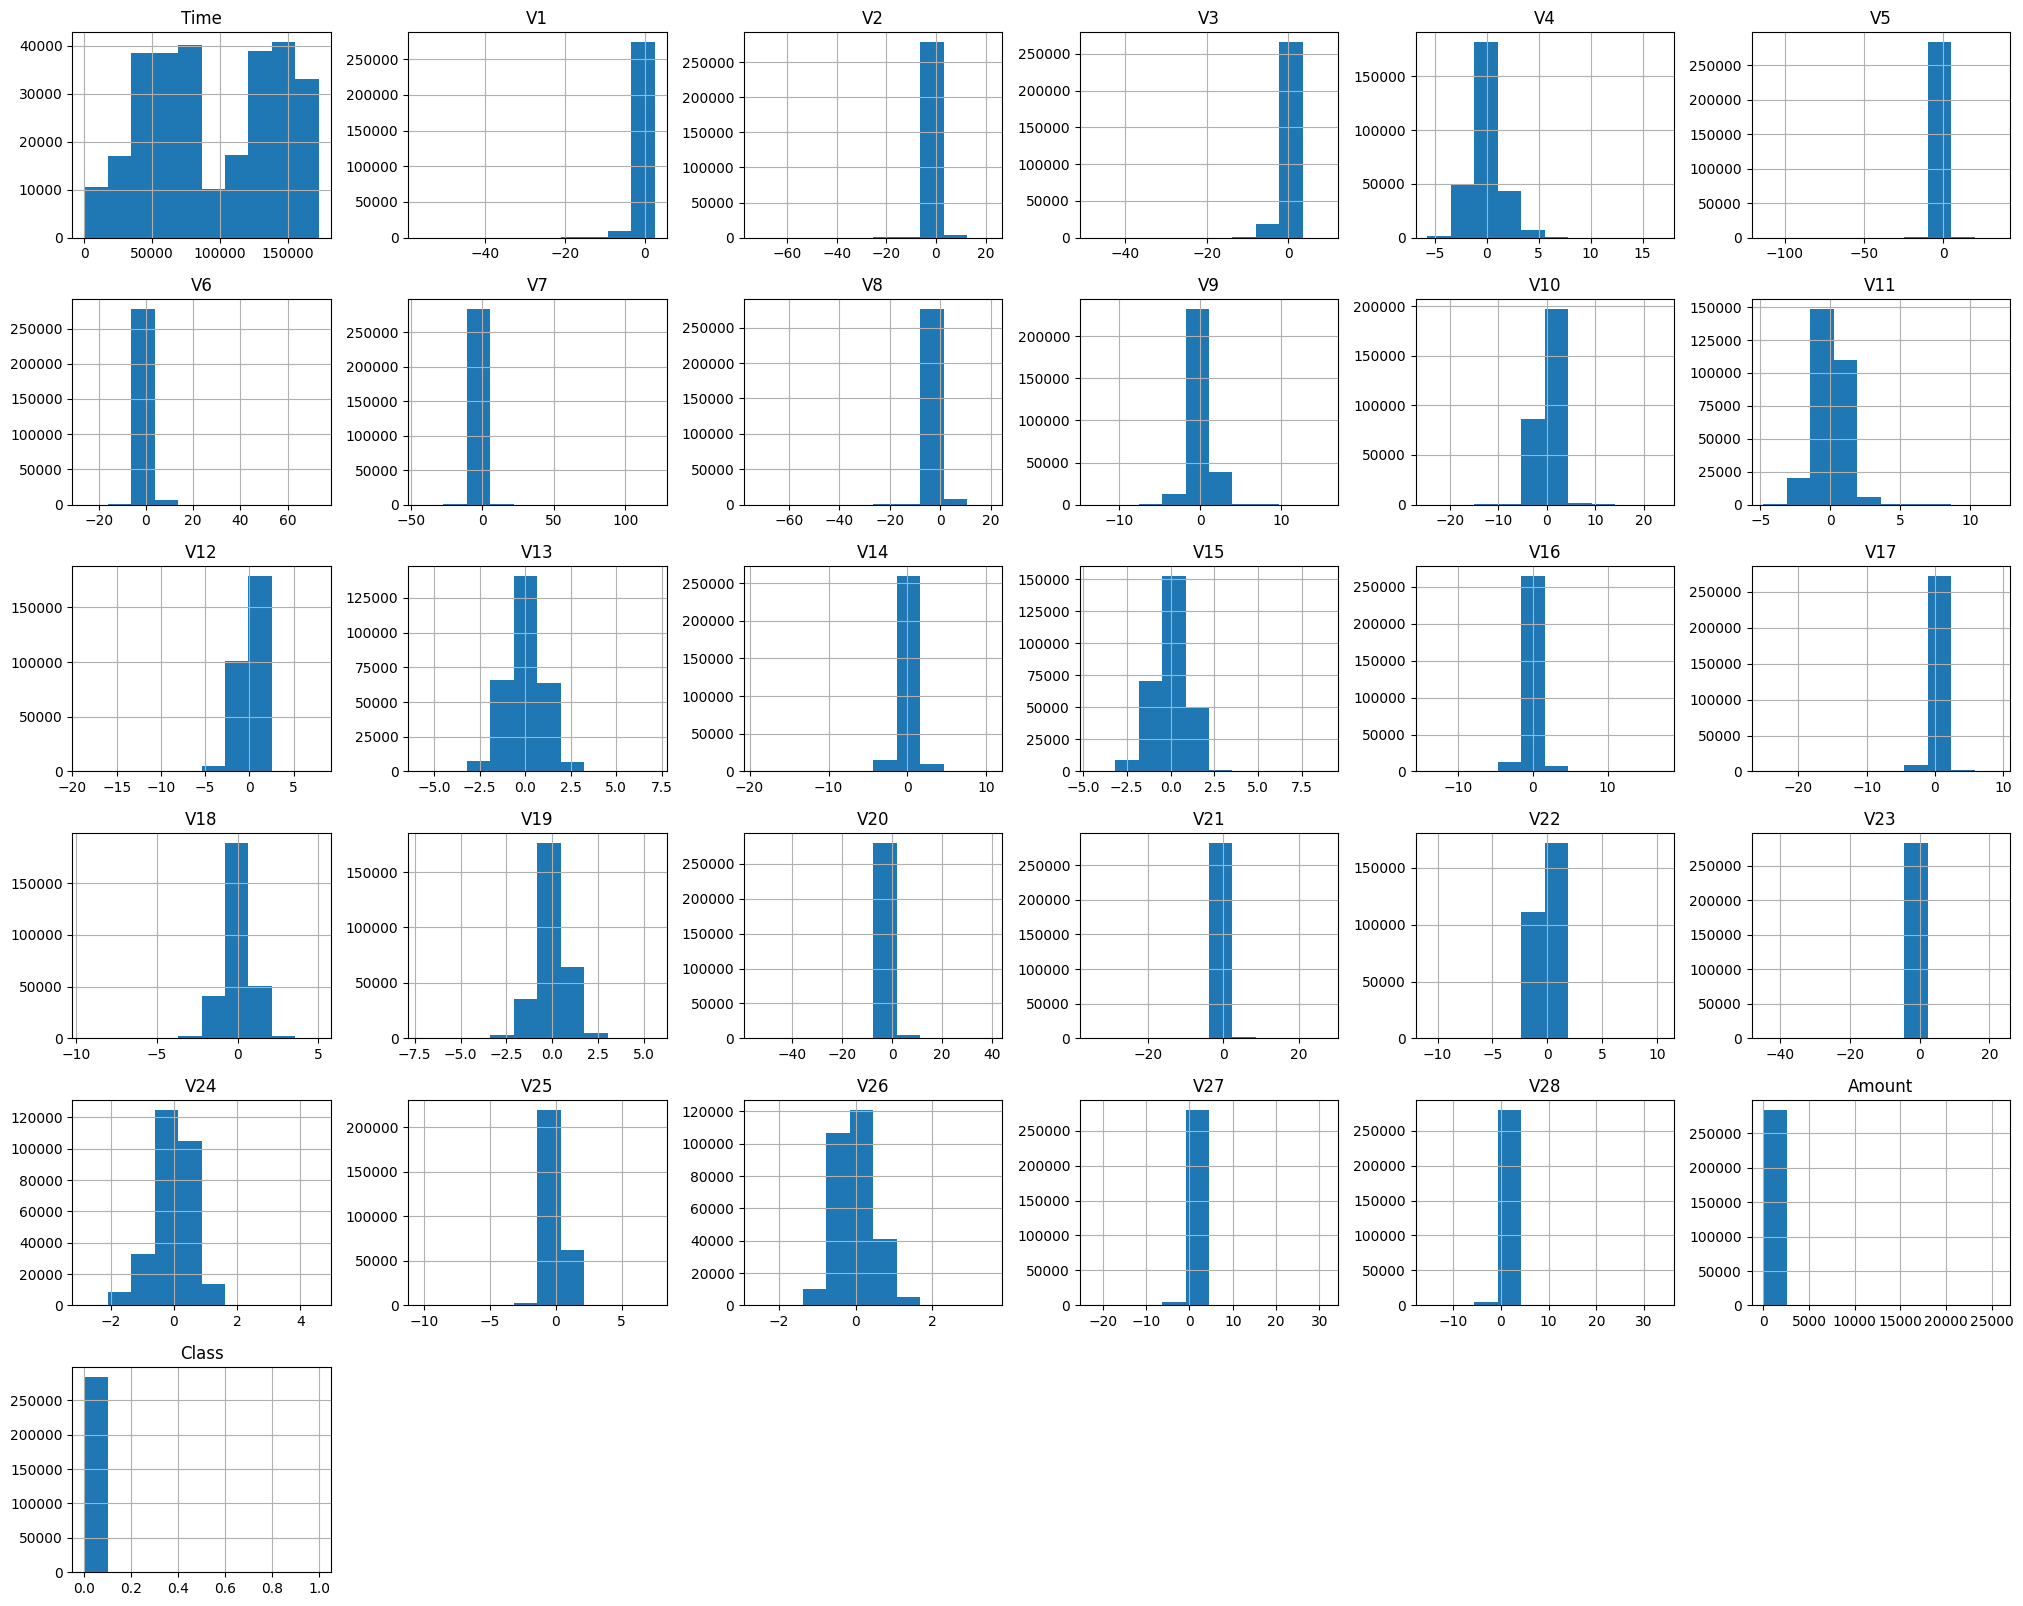

In [8]:
'''Check for outliers using histogram'''
cc_df.hist(figsize=(25,20))

C:\Users\Admin\AppData\Local\Temp\ipykernel_18556\297072040.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(3,3))


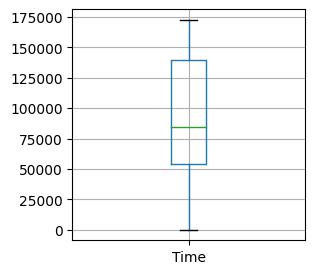

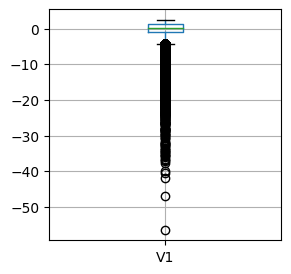

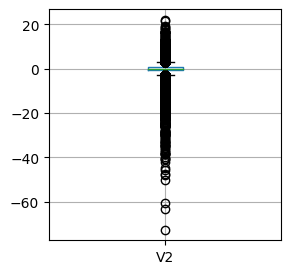

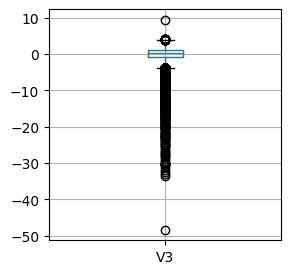

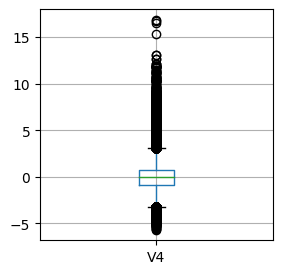

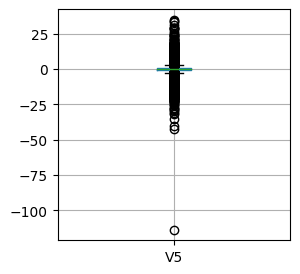

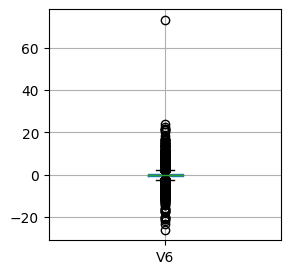

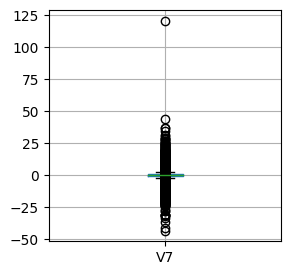

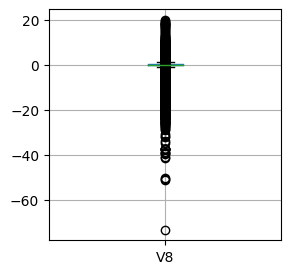

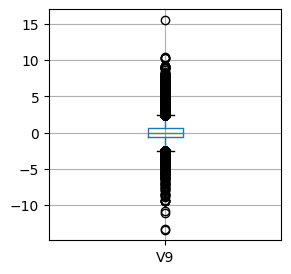

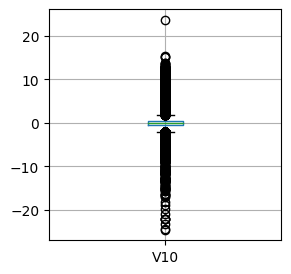

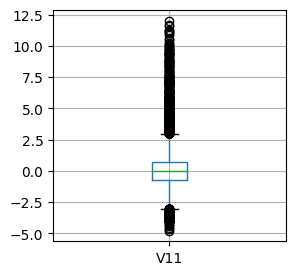

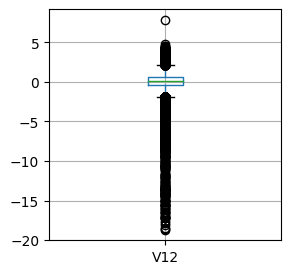

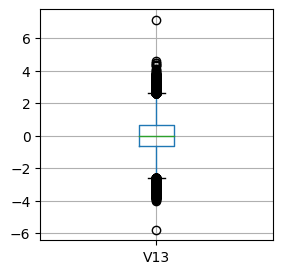

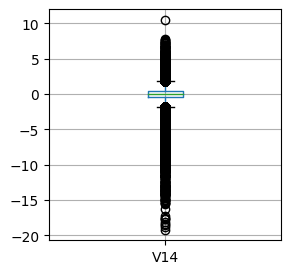

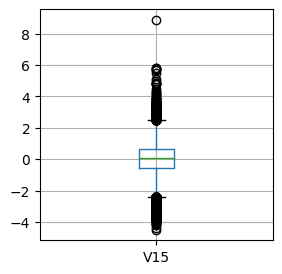

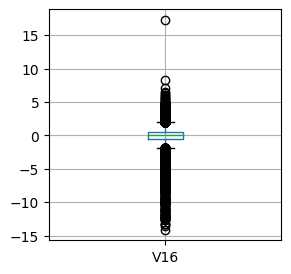

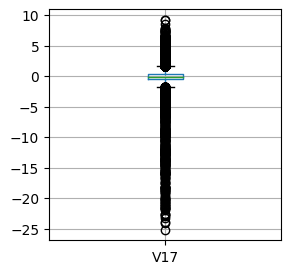

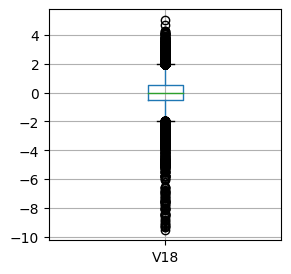

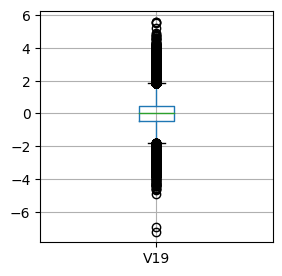

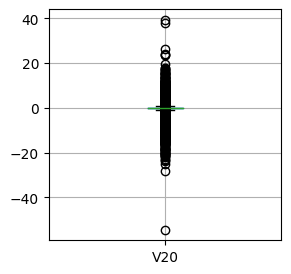

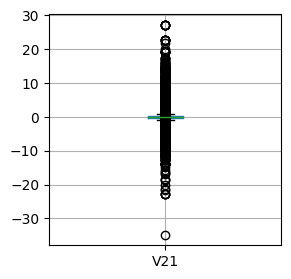

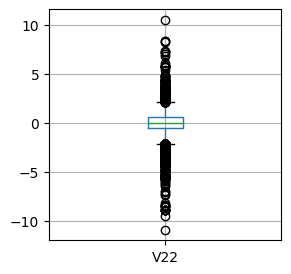

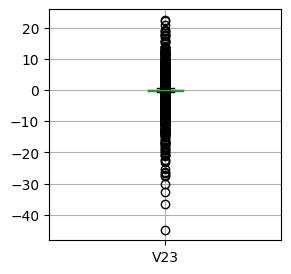

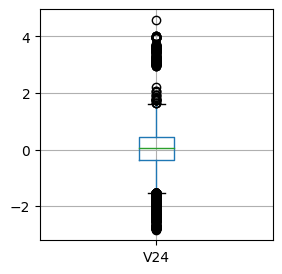

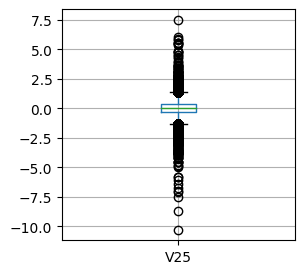

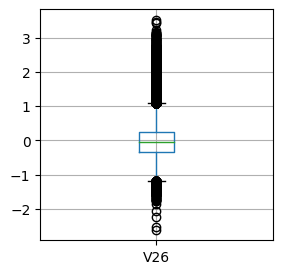

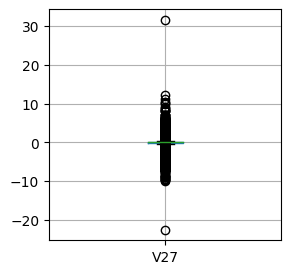

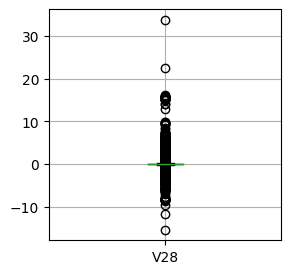

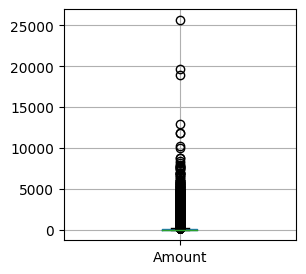

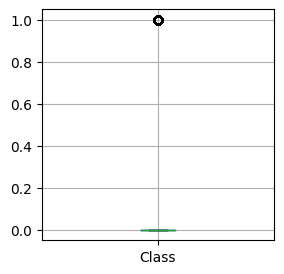

In [14]:
'''Using bosplots'''
for column in cc_df:
    plt.figure(figsize=(3,3))
    cc_df.boxplot([column])

In [4]:
'''Removing outliers function'''
def remove_outlier(df):
    from pandas.api.types import is_numeric_dtype
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [5]:

test = cc_df
test.shape

(284807, 31)

In [6]:
'''Fraud rows'''
fraud = cc_df[cc_df['Class'] == 1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [7]:
'''Non fraud rows'''
non_fraud = test[test['Class'] == 0]
non_fraud = non_fraud.drop('Class', axis=1)

In [8]:
'''Apply quantile filter function defined above'''
non_fraud2 = remove_outlier(non_fraud)
non_fraud2['Class'] = 0
non_fraud2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14285,25356.0,1.169427,0.627229,0.657882,2.492571,-0.118151,-0.559891,0.240836,-0.157699,-0.843038,...,-0.181962,-0.587933,0.073176,0.365952,0.363419,-0.190415,-0.011471,0.028100,15.14,0
14287,25358.0,1.167430,0.184312,0.399324,1.395424,-0.180570,-0.189950,0.039516,0.007571,0.350477,...,-0.107249,-0.087723,-0.055903,0.084045,0.650505,-0.311332,0.037600,0.014933,6.87,0
14291,25362.0,-1.192547,0.715833,1.556153,0.620500,0.210861,0.048327,0.881362,0.113032,-0.409085,...,-0.088614,-0.114110,-0.342898,0.006336,0.712230,-0.297096,0.192253,0.129074,92.00,0
14299,25371.0,0.878755,-0.426953,1.224448,1.393123,-1.093787,0.014139,-0.500645,0.187885,0.807760,...,0.104682,0.199128,-0.027216,0.397457,0.213253,-0.401016,0.061006,0.057373,121.00,0
14306,25379.0,0.965830,-0.301032,1.191189,1.472875,-0.867514,0.321859,-0.553332,0.228511,0.846297,...,0.005742,0.078116,-0.033245,0.081377,0.302088,-0.370742,0.072502,0.047205,81.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270542,164131.0,1.940164,-0.444628,-0.415444,0.247249,-0.496002,0.029253,-0.707941,0.246378,1.190089,...,-0.140866,-0.380837,0.421022,0.624965,-0.499818,-0.668269,0.021612,-0.036736,6.99,0
270550,164134.0,2.068912,-0.016286,-1.116030,0.377581,-0.019037,-1.114053,0.226424,-0.361271,0.457760,...,-0.290528,-0.676777,0.312623,-0.093329,-0.258580,0.202778,-0.067299,-0.059723,3.99,0
270559,164140.0,-0.535489,0.536310,1.087976,-0.491597,-0.587948,-0.564069,0.239539,0.173583,0.578697,...,-0.143237,-0.379895,0.053802,0.010583,-0.468433,-0.251894,-0.346209,-0.268564,50.00,0
270573,164147.0,1.946307,-0.604270,-0.351142,0.288148,-0.651986,0.174708,-0.918209,0.282330,1.190633,...,0.198751,0.668702,0.215507,0.725463,-0.355551,0.522919,-0.032984,-0.053222,7.99,0


In [9]:
'''Concatenate both cases'''
cc_df2 = pd.concat([fraud,non_fraud2], ignore_index=True, sort=True)
cc_df2 = cc_df2.reindex(columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class'])
cc_df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50447,164131.0,1.940164,-0.444628,-0.415444,0.247249,-0.496002,0.029253,-0.707941,0.246378,1.190089,...,-0.140866,-0.380837,0.421022,0.624965,-0.499818,-0.668269,0.021612,-0.036736,6.99,0
50448,164134.0,2.068912,-0.016286,-1.116030,0.377581,-0.019037,-1.114053,0.226424,-0.361271,0.457760,...,-0.290528,-0.676777,0.312623,-0.093329,-0.258580,0.202778,-0.067299,-0.059723,3.99,0
50449,164140.0,-0.535489,0.536310,1.087976,-0.491597,-0.587948,-0.564069,0.239539,0.173583,0.578697,...,-0.143237,-0.379895,0.053802,0.010583,-0.468433,-0.251894,-0.346209,-0.268564,50.00,0
50450,164147.0,1.946307,-0.604270,-0.351142,0.288148,-0.651986,0.174708,-0.918209,0.282330,1.190633,...,0.198751,0.668702,0.215507,0.725463,-0.355551,0.522919,-0.032984,-0.053222,7.99,0


In [10]:
'''Set x and y to respective columns'''
x = cc_df2.iloc[:,:30]
y = cc_df2.iloc[:,30]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50447,164131.0,1.940164,-0.444628,-0.415444,0.247249,-0.496002,0.029253,-0.707941,0.246378,1.190089,...,-0.272325,-0.140866,-0.380837,0.421022,0.624965,-0.499818,-0.668269,0.021612,-0.036736,6.99
50448,164134.0,2.068912,-0.016286,-1.116030,0.377581,-0.019037,-1.114053,0.226424,-0.361271,0.457760,...,-0.175543,-0.290528,-0.676777,0.312623,-0.093329,-0.258580,0.202778,-0.067299,-0.059723,3.99
50449,164140.0,-0.535489,0.536310,1.087976,-0.491597,-0.587948,-0.564069,0.239539,0.173583,0.578697,...,-0.143915,-0.143237,-0.379895,0.053802,0.010583,-0.468433,-0.251894,-0.346209,-0.268564,50.00
50450,164147.0,1.946307,-0.604270,-0.351142,0.288148,-0.651986,0.174708,-0.918209,0.282330,1.190633,...,-0.246325,0.198751,0.668702,0.215507,0.725463,-0.355551,0.522919,-0.032984,-0.053222,7.99


In [11]:
y.value_counts()

Class
0    49960
1      492
Name: count, dtype: int64

In [12]:
'''Oversampling'''
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
x_res, y_res = ros.fit_resample(x,y)


In [13]:
y_res.value_counts()


Class
1    49960
0    49960
Name: count, dtype: int64

<h3>Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.25, random_state = 0)

print(cc_df.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(284807, 31) (74940, 30) (24980, 30) (74940,) (24980,)


In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [17]:
y_pred = classifier.predict(X_test)
print(y_pred,y_test)

[0 1 1 ... 1 1 0] 28473    0
80049    1
80357    1
92446    1
81395    1
        ..
80209    1
35414    0
96496    1
82559    1
26422    0
Name: Class, Length: 24980, dtype: int64


Model 1 Evaluation

In [18]:
pred_comp_test=pd.DataFrame({'actual':y_test,'Pred':y_pred})
pred_comp_test

,actual,Pred
28473,0,0
80049,1,1
80357,1,1
92446,1,1
81395,1,1
...,...,...
80209,1,1
35414,0,0
96496,1,1
82559,1,1


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[12374   100]
 [  338 12168]]


In [20]:
(12371+12193)/(12371+103+313+12193)

0.9833466773418735

In [21]:
from sklearn.metrics import accuracy_score

print('accuracy:',accuracy_score(y_test,y_pred))

accuracy: 0.9824659727782226


In [22]:
y_pred_train = classifier.predict(X_train)

In [23]:
from sklearn.metrics import accuracy_score

print('accuracy:',accuracy_score(y_train,y_pred_train))

accuracy: 0.9808646917534027


<h3> KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

'''Check which K value to use'''

acc = []
for i in range(3,16,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    train_acc = np.mean(neigh.predict(X_train) == y_train)
    test_acc = np.mean(neigh.predict(X_test) == y_test)
    acc.append([train_acc, test_acc])

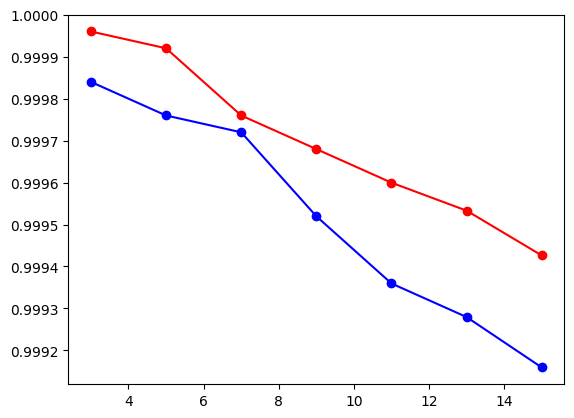

In [27]:
'''train accuracy plot''' 
plt.plot(np.arange(3,16,2),[i[0] for i in acc],"ro-")
'''test accuracy plot'''
plt.plot(np.arange(3,16,2),[i[1] for i in acc],"bo-")

In [28]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [29]:
'''Evaluate the model'''
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 


0.9997197758206565


Predictions,0,1
Actual,,
0,12467,7
1,0,12506


In [30]:
'''Error on train data'''
pred_train = knn.predict(X_train)
print(accuracy_score(y_train, pred_train))
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 


0.999759807846277


Predictions,0,1
Actual,,
0,37468,18
1,0,37454


<h3> SVM Model

In [31]:
from sklearn.svm import SVC

'''kernel = rbf'''
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train, y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test)

0.994835868694956

In [32]:
'''kernel = poly'''
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train, y_train)
pred_test_poly = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test)

0.994835868694956

In [33]:
# kernel = sigmoid
model_rbf = SVC(kernel = "sigmoid")
model_rbf.fit(X_train, y_train)
pred_test_rbf = model_rbf.predict(X_test)

np.mean(pred_test_rbf==y_test)

0.9278622898318655

In [34]:
pd.DataFrame({'Model':['RBF','Poly','Sigmoid'],'Accuracy':[99.48,99.48,92.76]})

,Model,Accuracy
0,RBF,99.48
1,Poly,99.48
2,Sigmoid,92.76


<h3> Lazy Classifier

In [21]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 14%|█▍        | 4/29 [00:38<03:28,  8.32s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 38%|███▊      | 11/29 [00:46<00:37,  2.06s/it]

<h3> XGBoost

In [55]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

In [56]:
accuracy_score(y_test, preds)

0.9923939151321057

<h3> Compare accuracy of all models

In [58]:
pd.DataFrame({'Model':['SVM (RBF/Poly)','KNN','Logistic Regression','XGBoost'],'Accuracy':[99.48,99.97,98.22,99.24]})

,Model,Accuracy
0,SVM (RBF/Poly),99.48
1,KNN,99.97
2,Logistic Regression,98.22
3,XGBoost,99.24


<h3> ROC Curves

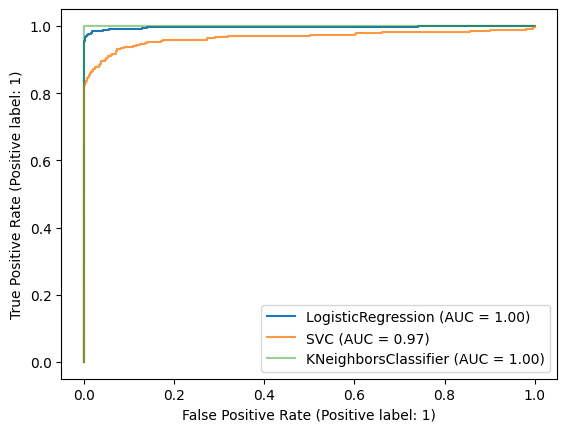

In [54]:
from sklearn.metrics import RocCurveDisplay

lr_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
ax = plt.gca()
rbf_disp = RocCurveDisplay.from_estimator(model_rbf, X_test, y_test, ax=ax, alpha=0.8)
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax, alpha=0.5)